In [1]:
from IPython import get_ipython
get_ipython().run_line_magic("reset","-f")

from PyPackageJonas import *

figures_path = "C:/Users/jonas/Git/Analysis-of-Production-flow-systems-with-focus-on-industry/Latex Thesis/figures/"

In [2]:
def z_from_x(x, M, k):
    x_min = x.min()
    x_max = x.max()
    z = (x - x_min) * (M - k + 1)/(x_max - x_min)
    return lambda l : (l - x_min) * (M - k)/(x_max - x_min)

def knots(k,M):
    t = [ (i<k) * 0 + (i-k+1)*(i >= k)*(i<=M-1) + (M-1-k+2)*(i>M-1) for i in range(M+1+k)]
    return np.array(t)

def Bx(x,k,i,t):
    if k == 0:
        if i >= M-1:
            return t[i] <= x
        else:
            return (t[i] <= x) & ( x < t[i+1])
    
    if t[i+k] == t[i]:
        c1 = 0
    else:
        c1 = Bx(x,k-1,i,t) * (x-t[i])/(t[i+k] - t[i]) 

    if t[i+k+1] == t[i+1]:
        c2 = 0
    else:
        c2 = Bx(x,k-1,i+1,t) * (t[i+k+1] - x)/(t[i+k+1] - t[i+1])

    return c1 + c2

0.062504375100001
0.12499874989999898
0.18749812500000004
0.24999749999999996
0.187498125
0.12499874989999903
0.06250437510000098


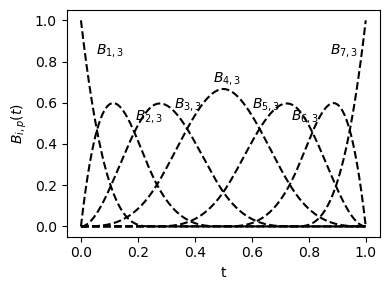

In [3]:
n_bins = 7

M = n_bins
p = 3

t = knots(p+1,M)
x = np.linspace(0,1,100000)
z_transformer = z_from_x(x,M,p)

fig,ax = plt.subplots(1,1, figsize = (4,3))
for i in range(M):
    spline = Bx(z_transformer(x),p,i,t)
    plt.plot(x, spline, "black", linestyle = "dashed")
    print(spline.mean())
    label = r"$" + "B_{" + f"{i+1},{p}" + "}" + r"$"
    x_an = (i)/(n_bins) + 1/(2*n_bins) + (i-(n_bins - 1)/2 ) / (8*n_bins)
    y_an = spline[np.where(x_an > x)[0][-1]]
    # plt.scatter(x_an,y_an)
    x_an = x_an - 1/(4 * n_bins) + ((n_bins-1)/2 -i) / (6*n_bins)
    y_an = y_an + 1/(4 * n_bins)
    
    ax.annotate(label, (x_an, y_an))
ax.set_xlabel("t")
ax.set_ylabel(r"$B_{i,p}\left(t\right)$")
fig.tight_layout()

# plt.savefig(figures_path + "MI estimation/B-spline basis functions - degree 3.pdf", bbox_inches='tight')
# plt.savefig(figures_path + "MI estimation/B-spline basis functions - degree 3", bbox_inches='tight')

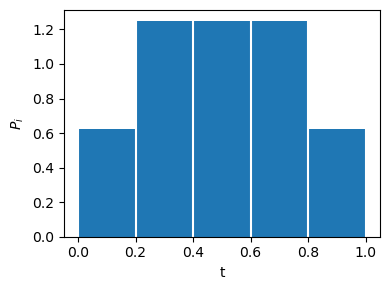

In [104]:
n_bins = 5

M = n_bins
p = 3

t = knots(p+1,M)
x = np.linspace(0,1,100000)
z_transformer = z_from_x(x,M,p)



res = np.vstack( [Bx(z_transformer(x),p,i,t) for i in range(M)] )

fig,ax = plt.subplots(1,1, figsize = (4,3))
ax.stairs(res.mean(axis = 1) * n_bins, np.linspace(0,1,n_bins+1), fill=True)
ax.vlines(np.linspace(0,1,n_bins+1), 0, res.mean(axis = 1).max() * n_bins, colors='w')
ax.set_xlabel("t")
ax.set_ylabel(r"$P_i$")
# ax.set_xticks(np.linspace(1,n_bins, n_bins) / n_bins - 1 / (2 * n_bins))
# ax.set_xticklabels([i+1 for i in range(n_bins)])
fig.tight_layout()

# plt.savefig(figures_path + "MI estimation/B-spline marginal dist - degree 3.pdf", bbox_inches='tight')
# plt.savefig(figures_path + "MI estimation/B-spline marginal dist - degree 3", bbox_inches='tight')

In [10]:
y_an

0.6143953919654397

0.02778564877315856
0.0555546290046192
0.08333194444444443
0.11110925925925925
0.11110925925925924
0.11110925925925925
0.11110925925925925
0.11110925925925924
0.11110925925925925
0.08333194444444444
0.05555462900461921
0.027785648773158655


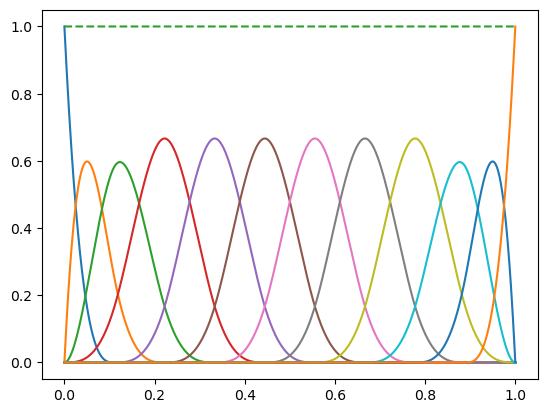

In [330]:


n_bins = 12
M = n_bins - 1
p = 3

t = knots(p,M)
# t = np.array([i for i in range(M)] + [M-1] * 10)

x = np.linspace(0,1,60000)
z_transformer = z_from_x(x,M,p)

# i = M-1
for i in range(-1,M):
    spline = Bx(z_transformer(x),p,i,t)
    plt.plot(x, spline)
    print(spline.mean())

    
# plt.plot(x, Bx(z_transformer(x),k,-1,t))

# x = 0.999
# z = z_from_x(x,M,k)


plt.plot(x,np.vstack([Bx(z_transformer(x),p,i,t) for i in range(-1,M)]).sum(axis = 0),"--");

# Bx(z_transformer(1),k,i,t)


In [176]:
rho = 0.4
data = scipy.stats.multivariate_normal.rvs(mean = None, cov = np.array([[1,rho],[rho,1]]), size = 100_000)

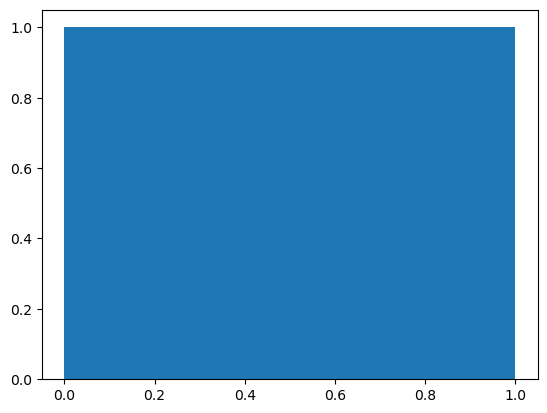

In [331]:
# xx = np.linspace(0,1,1000)
plt.hist( scipy.stats.ecdf(y).cdf.evaluate(y), bins = 100, density=True);

px
py
pxy
all done
0.09677276322348938
0.0871766935723889


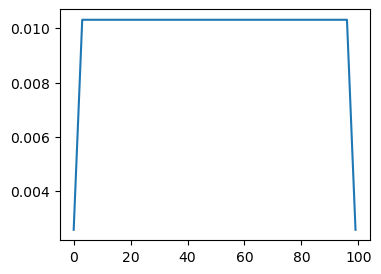

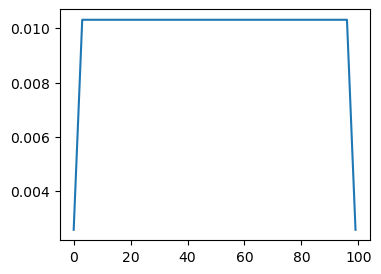

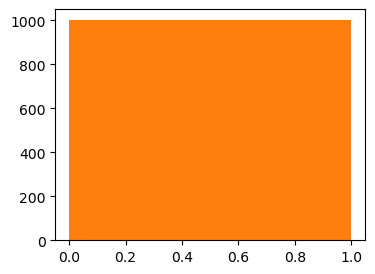

In [310]:


x = data[:,0]
# y = (0.3 * data[:,1])**3
y = data[:,1]


x = scipy.stats.ecdf(x).cdf.evaluate(x)
y = scipy.stats.ecdf(y).cdf.evaluate(y)


# x = x / x.var()**0.5
# y = y / (np.quantile(y, 0.975) - np.quantile(y, 0.025))



# idx = np.abs(y) < 0.005

# x = x[idx]
# y = y[idx]


n_bins = 100
M = n_bins - 1
p = 3

# M serves as a regularization

t = knots(p,M)

print("px")
z_transformer_x = z_from_x(x,M,p)
px_kernel = np.vstack([Bx(z_transformer_x(x),p,i,t) for i in range(-1,M)])
px = px_kernel.mean(axis = 1)
px_nonnull = px[px > 0]

print("py")
z_transformer_y = z_from_x(y,M,p)
py_kernel = np.vstack([Bx(z_transformer_y(y),p,i,t) for i in range(-1,M)])
py = py_kernel.mean(axis = 1)
py_nonnull = py[py > 0]


print("pxy")
# pxy_kernel = py_kernel[:,None,:] * px_kernel[None,:,:]
# pxy = (pxy_kernel).mean(axis = 2)
pxy = py_kernel @ px_kernel.T / py_kernel.shape[1]
pxy_nonnull = pxy[pxy > 0]

print("all done")
# print(f"xy: {(pxy_nonnull * np.log(pxy_nonnull)).sum()}")
print( (pxy_nonnull * np.log(pxy_nonnull)).sum() - (px_nonnull*np.log(px_nonnull)).sum() - (py_nonnull * np.log(py_nonnull)).sum() )
 
# pa = np.vstack([Bx(z_transformer_x(x),p,i,t) for i in range(-1,M)]).mean(axis = 1)
# py = np.vstack([Bx(z_transformer_y(x),p,i,t) for i in range(-1,M)]).mean(axis = 1)

# idx_non_zero = pa != 0

# centers = (np.linspace(0,n_bins+1,n_bins+1) / (n_bins+1))[:-1] + 1 / (2 * (n_bins))
# plt.scatter(centers,pa)

# H = - (pa[idx_non_zero] * np.log(pa[idx_non_zero])).sum()
# print(H)


# print(0.5 * np.log(2 * np.pi * np.exp(1)))

print(-0.5 * np.log(1 - rho**2))


hist = np.histogram2d(x, y, bins = n_bins)
xx_hist, yy_hist = np.meshgrid((hist[1][1:] + hist[1][:-1])/2, (hist[2][1:] + hist[2][:-1])/2)



levels = np.linspace(0, np.max( [hist[0].max() / y.__len__(), pxy.max()] ), 20)

dx = hist[1][1] - hist[1][0]
dy = hist[2][1] - hist[2][0]








fig, ax = plt.subplots(1,1, figsize = (4,3))
plt.plot(py_kernel.mean(axis = 1))


fig, ax = plt.subplots(1,1, figsize = (4,3))
plt.plot(px_kernel.mean(axis = 1))


fig, ax = plt.subplots(1,1, figsize = (4,3))
plt.hist(x, bins = 100)
plt.hist(y, bins = 100);
# plt.show()

# fig, ax = plt.subplots(1,1, figsize = (4,3))
# ax.hist2d(x, y, bins = n_bins);


# # plt.matshow(pxy, origin = "lower")
# fig, ax = plt.subplots(1,1, figsize = (4,3))
# ax.imshow(pxy, origin = "lower", extent=[x.min(),x.max(), y.min(), y.max()], aspect='auto')

# 8, 100
# 15, 1000
# 28, 10.000

In [333]:
px.sum()

1.0000000000000002

In [301]:
x[6796]

1e-05

In [300]:
np.where(x  < 0.00002)[0]

array([6796], dtype=int64)

In [302]:
px_kernel[:,6796]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

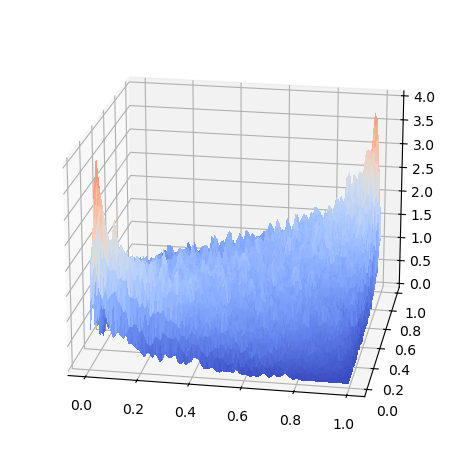

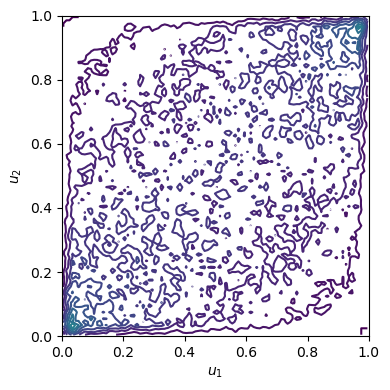

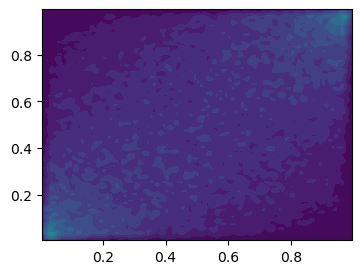

In [311]:
# B-Spline approximation

# 3d plot
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_trisurf(xx_hist.ravel(), yy_hist.ravel(), pxy.ravel() / (dx*dy) , cmap=cm.coolwarm ,linewidth=0.2, antialiased=False, vmax = 5)
# ax.set_zlim(0 , 35)
ax.view_init(20, -80, 0)
fig.tight_layout()


# contour plot
fig, ax = plt.subplots(1,1, figsize=(4,4))
res = ax.contour(xx_hist, yy_hist, pxy / (dx*dy),levels = levels / (dx*dy))
ax.set_xlabel("$u_1$")
ax.set_ylabel("$u_2$")
ax.set_xlim([0,1])
ax.set_ylim([0,1])
fig.tight_layout()


# contour plot 2
fig, ax = plt.subplots(1,1, figsize = (4,3))
plt.contourf(xx_hist,yy_hist, pxy, vmax = levels[-1], levels = levels)

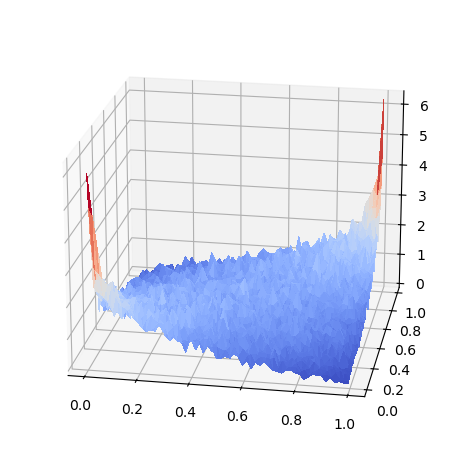

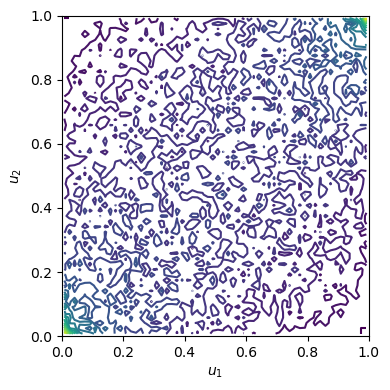

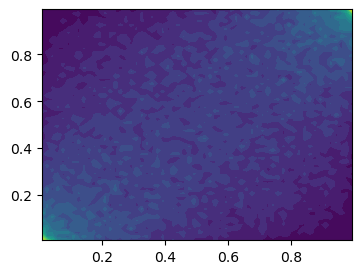

In [242]:
# emperical distribution

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_trisurf(xx_hist.ravel(),yy_hist.ravel(), hist[0].T.ravel()/ y.__len__() / (dx * dy), cmap=cm.coolwarm ,linewidth=0.2, antialiased=False, vmax = 5)
# ax.set_zlim(0 , 35)
ax.view_init(20, -80, 0)
fig.tight_layout()



# contour plot
fig, ax = plt.subplots(1,1, figsize=(4,4))
res = ax.contour(xx_hist, yy_hist, hist[0].T / y.__len__() / (dx*dy),levels = levels / (dx*dy))
ax.set_xlabel("$u_1$")
ax.set_ylabel("$u_2$")
ax.set_xlim([0,1])
ax.set_ylim([0,1])
fig.tight_layout()


fig, ax = plt.subplots(1,1, figsize = (4,3))
plt.contourf(xx_hist,yy_hist, hist[0].T/ y.__len__(), vmax = levels[-1], levels = levels)


In [249]:
fxy_nonnull = hist[0].T / y.__len__()  / (dx*dy)
fxy_nonnull = fxy_nonnull[fxy_nonnull > 0]

(fxy_nonnull * np.log(fxy_nonnull)).sum() * ((dx*dy))

0.10280829624814704

In [262]:
fxy_nonnull = pxy 
fxy_nonnull = fxy_nonnull[fxy_nonnull > 0]
-(fxy_nonnull * np.log(fxy_nonnull)).sum()

8.060878100412685

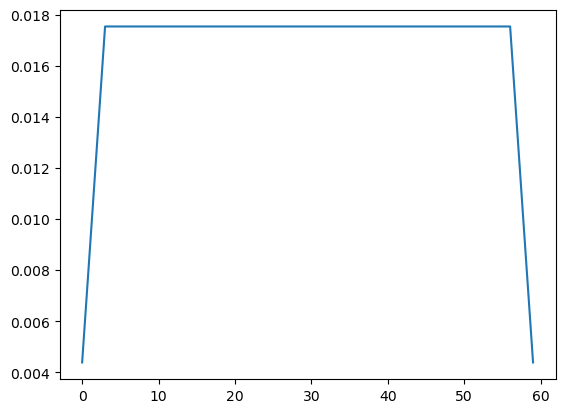

In [277]:
plt.plot(py_kernel.mean(axis = 1))

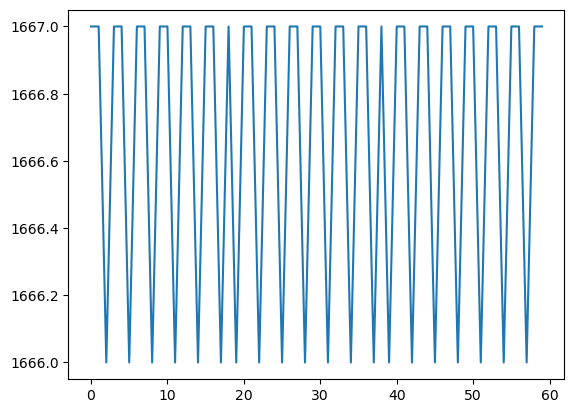

In [275]:
plt.plot(hist[0].T.sum(axis = 1))

In [274]:
py_kernel.sum()

100000.00000000004

In [86]:
y.max()

1.9999624724813945

In [87]:
x_edges = np.histogram(x, n_bins)[1]
x_centers = (x_edges[1:] + x_edges[:-1])/2

y_edges = np.histogram(y, n_bins)[1]
y_centers = (y_edges[1:] + y_edges[:-1])/2

In [93]:
xx,yy = np.meshgrid(x_centers,y_centers)

In [94]:
yy.min()

0.016666354003999125

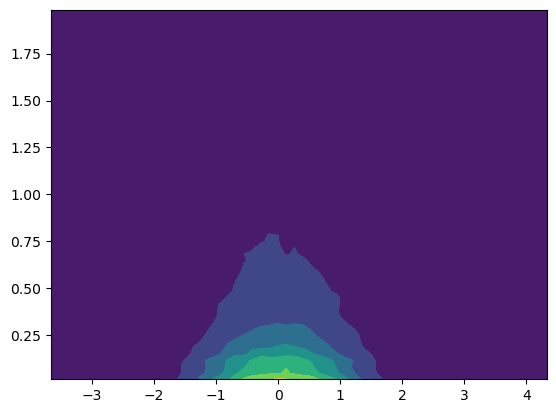

In [95]:
plt.contourf(xx, yy, pxy)

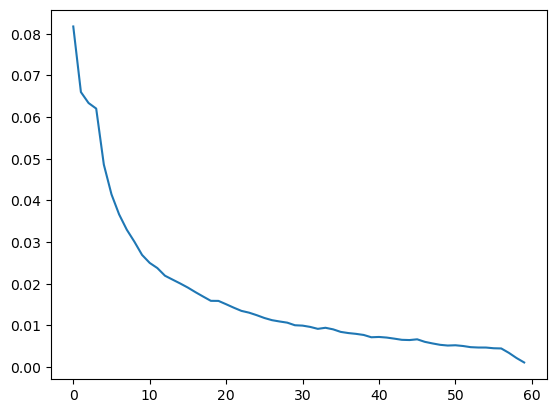

In [128]:
plt.plot(pxy.sum(axis =1))

In [101]:
xx

array([[-3.66119519, -3.52581333, -3.39043146, ...,  4.05557105,
         4.19095291,  4.32633478],
       [-3.66119519, -3.52581333, -3.39043146, ...,  4.05557105,
         4.19095291,  4.32633478],
       [-3.66119519, -3.52581333, -3.39043146, ...,  4.05557105,
         4.19095291,  4.32633478],
       ...,
       [-3.66119519, -3.52581333, -3.39043146, ...,  4.05557105,
         4.19095291,  4.32633478],
       [-3.66119519, -3.52581333, -3.39043146, ...,  4.05557105,
         4.19095291,  4.32633478],
       [-3.66119519, -3.52581333, -3.39043146, ...,  4.05557105,
         4.19095291,  4.32633478]])

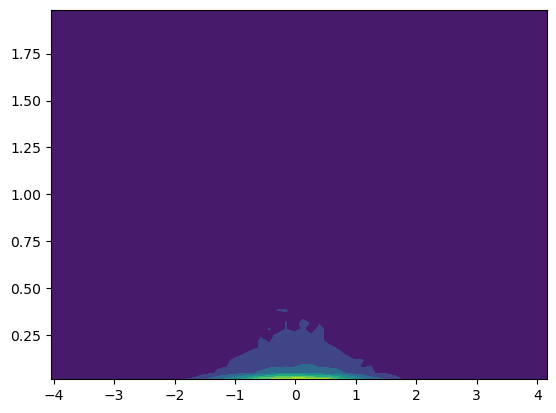

In [156]:
pxy_hist = np.histogram2d(x, y, bins = n_bins)
# pxy_hist

xx, yy = np.meshgrid((pxy_hist[1][1:] + pxy_hist[1][:-1])/2, (pxy_hist[2][1:] + pxy_hist[2][:-1])/2)
plt.contourf(xx,yy, pxy_hist[0].T/ y.__len__(), vmax = 0.011)

# plt.hist2d(x,y);

In [157]:
(pxy_hist[0].T/ y.__len__()).sum()

1.0

In [148]:
pxy_hist[0].T.max()/ y.__len__()

0.010509296685529508

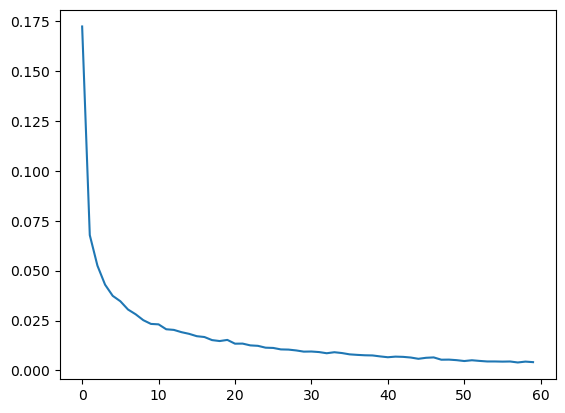

In [132]:
plt.plot(pxy_hist[0].sum(axis = 0)/ y.__len__()) 

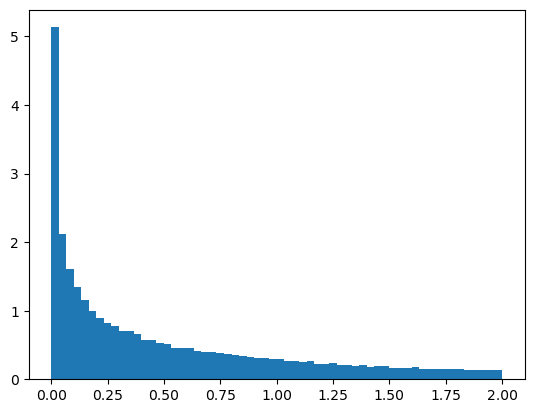

In [141]:
plt.hist(y,density=True,bins = n_bins);

In [134]:
(pxy_hist[0].sum(axis = 0)/ y.__len__()).sum()

1.0

In [125]:
pxy_hist[0][:,10]

array([  0.,   0.,   0.,   0.,   0.,   0.,   3.,   1.,   1.,   4.,   6.,
         7.,  11.,  13.,  16.,  32.,  47.,  25.,  43.,  55.,  71.,  75.,
        65.,  85., 101., 101.,  84., 119.,  92.,  89., 126.,  96., 106.,
        93.,  67.,  50.,  64.,  52.,  37.,  29.,  19.,  19.,  14.,  10.,
         9.,   4.,   3.,   2.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.])

In [97]:
pxy_kernel = py_kernel[:,None,:] * px_kernel[None,:,:]
pxy = (pxy_kernel).mean(axis = 2)

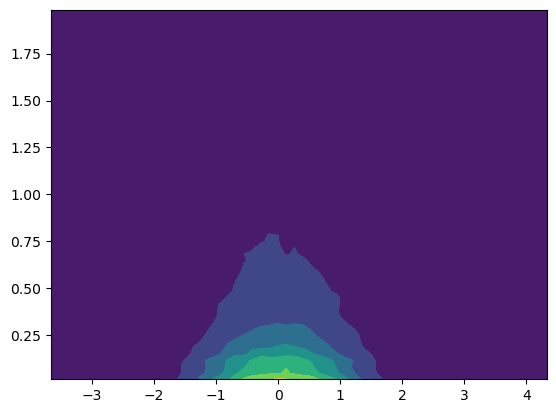

In [98]:
plt.contourf(xx, yy, pxy)

In [52]:
pxy.shape

(60, 60)

In [53]:
py_kernel.shape

(60, 100000)

In [151]:
pxy = py_kernel @ px_kernel.T / py_kernel.shape[1]
# pxy = px_kernel @ py_kernel.T / py_kernel.shape[1]
# pxy = (pxy_kernel).mean(axis = 2)
# pxy

In [170]:
levels = np.linspace(0,0.011, 20)

array([0.        , 0.00057895, 0.00115789, 0.00173684, 0.00231579,
       0.00289474, 0.00347368, 0.00405263, 0.00463158, 0.00521053,
       0.00578947, 0.00636842, 0.00694737, 0.00752632, 0.00810526,
       0.00868421, 0.00926316, 0.00984211, 0.01042105, 0.011     ])

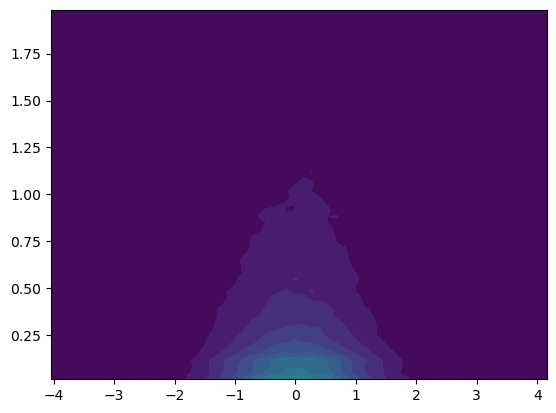

In [171]:
temp = plt.contourf(xx, yy, pxy, vmax = 0.011, levels = levels)
temp.levels

In [172]:
pxy.max()

0.005073743589942839

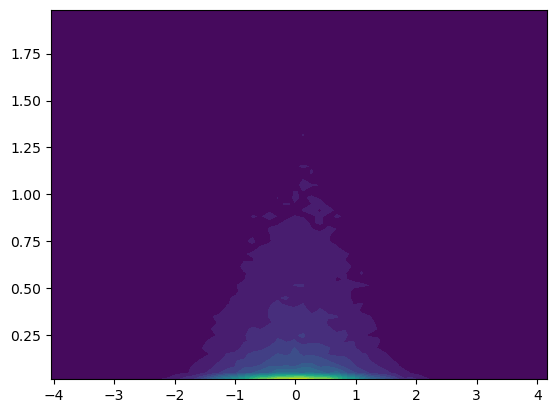

In [173]:
pxy_hist = np.histogram2d(x, y, bins = n_bins)
# pxy_hist

xx, yy = np.meshgrid((pxy_hist[1][1:] + pxy_hist[1][:-1])/2, (pxy_hist[2][1:] + pxy_hist[2][:-1])/2)
temp = plt.contourf(xx,yy, pxy_hist[0].T/ y.__len__(), vmax = 0.011, levels = levels)

# plt.hist2d(x,y);

In [163]:
temp.levels

array([0.    , 0.0015, 0.003 , 0.0045, 0.006 , 0.0075, 0.009 , 0.0105,
       0.012 ])